# <font color='#d35400'> Lab 5 | Hypothesis Testing </font>
Welcome to Lab 5! In this lab we work on hypothesis testing by implementing several different hypothesis tests from scratch and then comparing the results we get to the outputs of python functions. This lab explores using the World Health Organization (WHO) data which tracks a number of useful health-related metrics aggregated at the country level.

<p align="center">
  <img src="dog_loves_sausages.jpeg" alt="Alt Text", width="300"/>
</p>

### <font color='#FF8C00'> About the Dataset </font>
We start off this Jupyter Notebook by first examining the dataset from `who2009.csv`. We look at the features that are in the dataset, as well as the data types being used in each of the features. We would like to get an idea of what we're dealing with, so we start off by displaying the dataset in Pandas.

In [1]:
# importing the pandas library
import pandas as pd

# importing the ipython library
from IPython.display import display

# read the .csv file using the pandas library
who_df = pd.read_csv("who2009.csv")

# displaying the pandas dataframe
who_df

,country,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v257,v258,v259,v260,countrycode,iso3,regioncode,regionname,subregioncode,subregionname
0,Afghanistan,41,40,41,42,42,42,42,41,42,...,NaN,NaN,NaN,NaN,4,AFG,142,Asia,34,Southern Asia
1,Albania,66,68,71,71,73,74,69,71,72,...,2540.0,3920.0,6580.0,1.0,8,ALB,150,Europe,39,Southern Europe
2,Algeria,65,68,70,68,71,73,66,70,71,...,4350.0,5130.0,7640.0,NaN,12,DZA,2,Africa,15,Northern Africa
3,Andorra,74,76,78,81,83,85,77,80,81,...,NaN,NaN,NaN,NaN,20,AND,150,Europe,39,Southern Europe
4,Angola,38,46,51,44,51,55,41,49,53,...,1870.0,1910.0,4400.0,42.5,24,AGO,2,Africa,17,Middle Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),70,71,72,74,77,78,72,74,75,...,6820.0,8380.0,11920.0,10.0,862,VEN,19,Americas,5,South America
189,Viet Nam,64,68,70,68,72,75,66,70,72,...,610.0,1400.0,2550.0,22.8,704,VNM,142,Asia,35,South-Eastern Asia
190,Yemen,56,59,62,59,63,66,58,61,64,...,1280.0,1710.0,2200.0,17.5,887,YEM,142,Asia,145,Western Asia
191,Zambia,52,41,45,55,44,47,53,42,46,...,820.0,870.0,1220.0,64.3,894,ZMB,2,Africa,14,Eastern Africa


In [2]:
# displaying the descriptive statistics of the dataset
display("Summary Statistics ", who_df.info())

# displaying the summary of the dataset
display("Description of Dataset", who_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 267 entries, country to subregionname
dtypes: float64(209), int64(53), object(5)
memory usage: 402.7+ KB


'Summary Statistics '

None

'Description of Dataset'

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v254,v255,v256,v257,v258,v259,v260,countrycode,regioncode,subregioncode
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,163.000000,124.000000,164.000000,153.000000,172.000000,175.000000,93.000000,193.000000,193.000000,193.000000
mean,62.145078,63.860104,65.502591,67.310881,68.875648,70.274611,64.626943,66.367876,67.839378,58.595855,...,87.128834,81.491935,84.902439,5999.869281,8424.825581,12026.742857,25.901075,431.181347,71.963731,83.777202
std,9.752654,9.834363,9.813428,10.199404,10.690975,10.754952,9.956975,10.207963,10.223548,9.363181,...,13.090920,20.795362,17.016852,7204.320249,10187.348849,13386.001361,25.445049,254.403312,68.744195,106.063990
min,25.000000,34.000000,39.000000,37.000000,42.000000,42.000000,31.000000,38.000000,41.000000,34.000000,...,32.000000,21.000000,0.000000,250.000000,210.000000,290.000000,0.000000,4.000000,2.000000,5.000000
25%,57.000000,57.000000,58.000000,61.000000,62.000000,63.000000,58.000000,60.000000,61.000000,52.000000,...,83.500000,77.000000,82.000000,1190.000000,1427.500000,2220.000000,1.200000,208.000000,2.000000,14.000000
50%,64.000000,66.000000,67.000000,70.000000,73.000000,74.000000,67.000000,70.000000,71.000000,60.000000,...,91.000000,90.500000,90.500000,2970.000000,4385.000000,6580.000000,19.700000,428.000000,19.000000,35.000000
75%,69.000000,71.000000,72.000000,75.000000,77.000000,78.000000,72.000000,74.000000,75.000000,65.000000,...,96.000000,96.000000,96.000000,8100.000000,9860.000000,16515.000000,46.100000,646.000000,142.000000,145.000000
max,76.000000,78.000000,81.000000,82.000000,85.000000,86.000000,79.000000,81.000000,83.000000,74.000000,...,100.000000,100.000000,100.000000,38760.000000,46510.000000,63590.000000,86.100000,894.000000,150.000000,419.000000


### <font color='#FF8C00'> Dataset Information & Summary </font>
According `.info()` and `.describe()`, we can see that there are 193 rows & 267 columns. With regards to te column headings on the dataset, they are presented as follows:
- **Country:** Member State of the World Health Organization
- **v9:** life expectancy at birth for both sexes
- **v22:** infant mortality rate of both sexes
- **v159:** health workforce
- **v168:** hospital beds
- **v174:** total expenditure on health as % of GDP
- **v186:** out of pocket expenditure as % of private expenditure on health
- **v192:** per capita total expenditure on health
- **v249:** total fertility rate
- **v259:** gross national income per capita 
- **regionname:** alphabetic ragion name

## <font color = '#FF8C00'> Section 1 </font> | Data Preparation
In this section, we work on reading a `.csv` file in Pandas, and then perform some analysis, such as looking at the size of the dataset and understand what the features are by referring to the code book. We then rename the columns according to the code book. The instructions are arranged in the bullet points as follows:
- [x] First read the who2009.csv ﬁle into your python development environment using pandas. You’ll need to import pandas and then apply the `.read csv` method.
- [x] Assess the size of the data set using the .shape method. You should notice that there are a large number of columns in the data. We will only need a very small number of them. I have provided a codebook to go with this data (WHO2009SubsetCodebook.pdf). Drop columns from the data, keeping only those identiﬁed in the codebook.
- [x] Rename the columns in the reduced data set to names that are appropriate descriptors of the information contained in each variable according to the codebook. You may ﬁnd the `.rename` method to be useful. Use the following variable names: `country`, `life exp`, `infant mortality`, `phys density`, `hospital bed`, `health exp` `percent GDP`, `OOP percent exp`, `health exp PC`, `fertility rate`, `GNI PC`, `regionname`.

### <font color = '#FF8C00'> Finding the Shape of the Dataframe </font>
We start off by finding the shape of the data frame, which means we get information as to how many rows and columns are in the dataset. Using `.shape` returns a tuple, where the first element is the number of rows and the second element is the number of columns.

In [3]:
# printing out the shape of the data frame and the rows and columns
print("The Shape of the Dataframe: ", "\n")
print("Number of Rows: ", who_df.shape[0], "\n")
print("Number of Columns: ", who_df.shape[1])

The Shape of the Dataframe:  

Number of Rows:  193 

Number of Columns:  267


### <font color = '#FF8C00'> The Codebook & Dropping the Data Columns </font>
It can be seen in the dataset that there are large number of columns. We need a small number of them, so we drop the columns that are not mentioned in the codebook and keep the ones that are.

In [4]:
# the list of columns in the data set that are included in the code book
col_list = ["country", "v9", "v22", "v159", "v168", "v174", "v186", "v192", "v249", "v259", "regionname"]

# we take these columns of interest and create a new data frame
new_who_df = who_df[col_list]

# displaying the new data frame with the first 5 columns
new_who_df.head(5)


,country,v9,v22,v159,v168,v174,v186,v192,v249,v259,regionname
0,Afghanistan,42,165,2.0,4.0,9.2,78.5,91.0,7.1,NaN,Asia
1,Albania,72,13,12.0,30.0,6.5,94.9,381.0,2.1,6580.0,Europe
2,Algeria,71,33,11.0,17.0,4.2,94.6,315.0,2.4,7640.0,Africa
3,Andorra,81,3,36.0,32.0,7.4,73.4,2980.0,1.3,NaN,Europe
4,Angola,53,116,1.0,8.0,2.6,100.0,115.0,6.5,4400.0,Africa


### <font color = '#FF8C00'> Renaming the Data Columns </font>
We can now work on renaming the data columns. We rename the data columns as follows:
- `country` as `country`
- `v9` as `life_exp`
- `v22` as `infant_mortality`
- `v159` as `phys_density`
- `v168` as `hospital_bed`
- `v174` as `health_exp_percent_GDP`
- `v186` as `OOP_percent_exp`
- `v192` as `health_exp_PC`
- `v249` as `fertility_rate`
- `v259` as `GNI_PC`
- `regionname` as `regionname`


In [5]:
# renaming the columns as mentioned in the code book
new_who_df = new_who_df.rename(columns={'v9' : 'life_exp', 'v22' : 'infant_mortality', 'v159' : 'phys_density'})
new_who_df = new_who_df.rename(columns={'v168' : 'hospital_bed', 'v174' : 'health_exp_percent_gdp'})
new_who_df = new_who_df.rename(columns={'v186' : 'OOP_percent_exp', 'v192' : 'health_exp_PC'})
new_who_df = new_who_df.rename(columns={'v249' : 'fertility_rate', 'v259' : 'GNI_PC'})

# displaying the new data frame with renamed columns
new_who_df.head(5)

,country,life_exp,infant_mortality,phys_density,hospital_bed,health_exp_percent_gdp,OOP_percent_exp,health_exp_PC,fertility_rate,GNI_PC,regionname
0,Afghanistan,42,165,2.0,4.0,9.2,78.5,91.0,7.1,NaN,Asia
1,Albania,72,13,12.0,30.0,6.5,94.9,381.0,2.1,6580.0,Europe
2,Algeria,71,33,11.0,17.0,4.2,94.6,315.0,2.4,7640.0,Africa
3,Andorra,81,3,36.0,32.0,7.4,73.4,2980.0,1.3,NaN,Europe
4,Angola,53,116,1.0,8.0,2.6,100.0,115.0,6.5,4400.0,Africa


### <font color = '#FF8C00'> Plotting the Distribution of `GNI_PC` </font>
Lastly, we plot the distribution of the `GNI_PC` variable. We achieve this by plotting a histogram and then saving the figure to a `plots` directory.


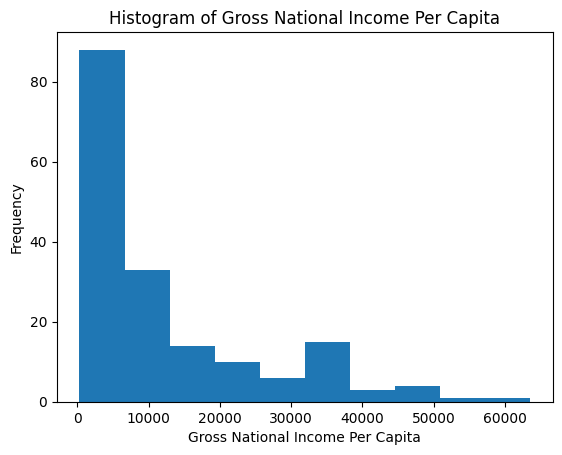

In [6]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# plotting the gni_pc variable
plt.hist(new_who_df["GNI_PC"])

# naming the title, x and y axis
plt.title("Histogram of Gross National Income Per Capita")
plt.ylabel("Frequency")
plt.xlabel("Gross National Income Per Capita")

# saving the plot figure
plt.savefig(r"C:\GitHub\DataScience\wk_06\plots\GNI_PC")

# displaying the plot
plt.show()


### <font color='#FF8C00'> Sources Used For Section One </font>
- https://stackoverflow.com/questions/16616141/keep-certain-columns-in-a-pandas-dataframe-deleting-everything-else
- https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

## <font color = '#FF8C00'> Section 2 | One Sample T-test </font>
The purpose of a one sample t-test is meant to  compare a numerical variable against a fixed number. In this section, we assess the life expectancy in Europe by creating a new data set. We achieve this creating a new function that takes in data and a value, and then returns the test-statistic p-value as outputs. We use that function to then to assess whether the life expectancy in Europe is different from 70 and 76 years, and then compare them using `scipy.stats`. We achieve this in the following bullet points:

- [x] Begin by creating a second data set that includes only rows in which the regionname is "Europe"
- [x] The test statistic in a one sample t-test is shown below, where s is the standard deviation and where $\mu$ is the sample mean, n is the number of observations in the sample, $x_i$ is the value of the variable for the i-th observation, and M is the number chosen in this jupyter notebook. The p-value is found using the formula below.
- [x] Write a function to assess whether the life expectancy in Europe is significantly different from 70 and 76 years
- [x] Validate the code by comparing the results to the built-in one-sample t-test. We achieve this by using the `ttest_1samp` method from `scipy.stats`.

### <font color = '#FF8C00'> Formulas </font>
$$
t = \frac{\mu - M}{s / \sqrt{n}}
$$

$$
s = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

$$
p = 2(1 - P(|t|))
$$

### <font color = '#FF8C00'> Filtering Out Europe </font>
We start off by focusing on the `regionname` column. We would like to filter out the places which belong in the Europe region, and find more details about the features we filtered out for those countries that belong in that region.


In [7]:
# creating the second dataset where the region name is only "Europe"
europe_df = new_who_df[new_who_df["regionname"] == "Europe"]

# displaying the europe data frame of the top 5
europe_df.head(5)

,country,life_exp,infant_mortality,phys_density,hospital_bed,health_exp_percent_gdp,OOP_percent_exp,health_exp_PC,fertility_rate,GNI_PC,regionname
1,Albania,72,13,12.0,30.0,6.5,94.9,381.0,2.1,6580.0,Europe
3,Andorra,81,3,36.0,32.0,7.4,73.4,2980.0,1.3,NaN,Europe
9,Austria,80,4,37.0,76.0,10.2,65.8,3608.0,1.4,38140.0,Europe
15,Belarus,70,5,48.0,113.0,6.4,68.8,623.0,1.2,10740.0,Europe
16,Belgium,80,4,42.0,53.0,9.9,79.0,4.0,1.6,34790.0,Europe


### <font color = '#FF8C00'> Building the Function </font>
Next, we move on to building out function using the formulas mentioned above. The function is designed to take the data and the value M as inputs and returns the test statistic and p-value as outputs. 

We work with the CDF of the t-dsitribution. From scipy.stats, we import t to load the t-distribution and then work with `t.cdf` with the degrees of freedom set to `n-1`. The `.mean` and `.std` methods from `numpy` are helpful, but be sure to use `ddof` = 1 if we use `.std`.

In [8]:
# importing the required libraries
import numpy as np
import math
from scipy.stats import t
from scipy.stats import ttest_1samp

In [9]:
# creating the t-test function
def one_smaple_t_test(feature_col, input_value):

    # converting the column into a list
    feature_list = feature_col.tolist()

    # calculating the mean
    feature_mean = np.mean(feature_col)

    # finding number of observations and square root it
    observation = len(feature_col)
    sqrt_observation = math.sqrt(observation)

    # (observation - mean) ^ 2
    difference_list = []
    for row in range(0, len(feature_list)):
        difference = (feature_list[row] - feature_mean)**2
        difference_list.append(difference)
    
    # finding the sum of the differences
    sum_of_differences = sum(difference_list)

    # calculating the variance
    variance = sum_of_differences * (1 / (observation - 1))

    # calculating the standard deviation
    standard_deviation = math.sqrt(variance)

    # calculating the t-value
    t_value = (feature_mean - input_value) / (standard_deviation / sqrt_observation)

    # calculating the p-value
    p_value = 2 * (1- t.cdf(abs(t_value), observation - 1))

    # returning t value and p value
    return t_value, p_value

### <font color = '#FF8C00'> Life Expectancy </font>
We now use the function that we built to compare the life expectancy in Europe is different from 70 years compared to 76 years. The function will then return the t value and the p value.


In [10]:
# running the function where input_value is 70 as in 70 years
t_value_seventy, p_value_seventy = one_smaple_t_test(europe_df['life_exp'], 70)
print("The t value for Life Expectancy of 70: ", t_value_seventy, "\n")
print("The p value for Life Expectancy of 70: ", p_value_seventy, "\n" )

# running the function where input_value is 76 as in 76 years
t_value_seventy_six, p_value_seventy_six = one_smaple_t_test(europe_df['life_exp'], 76)
print("The t value for Life Expectancy of 76: ", t_value_seventy_six, "\n")
print("The p value for Life Expectancy of 76: ", p_value_seventy_six, "\n" )


The t value for Life Expectancy of 70:  9.938016169764737 

The p value for Life Expectancy of 70:  1.7605916724505732e-12 

The t value for Life Expectancy of 76:  1.1814424817202844 

The p value for Life Expectancy of 76:  0.24423470312189988 



### <font color = '#FF8C00'> Validating the Function </font>
We now work on validating the function. Using the results we obtained in the previous python cell, we now compare our results with what we derive using the `scipy.stats` library, using the `ttest_1samp` method.

In [11]:
tt_value_seventy, pp_value_seventy = ttest_1samp(europe_df['life_exp'], 70)
print("The t value for Life Expectancy of 70: ", tt_value_seventy, "\n")
print("The p value for Life Expectancy of 70: ", pp_value_seventy, "\n")

tt_value_seventy_six, pp_value_seventy_six = ttest_1samp(europe_df['life_exp'], 76)
print("The t value for Life Expectancy of 76: ", tt_value_seventy_six, "\n")
print("The p value for Life Expectancy of 76: ", pp_value_seventy_six, "\n")

The t value for Life Expectancy of 70:  9.938016169764737 

The p value for Life Expectancy of 70:  1.760564922569916e-12 

The t value for Life Expectancy of 76:  1.1814424817202844 

The p value for Life Expectancy of 76:  0.24423470312189977 



### <font color = '#FF8C00'> Plotting the Life Expectancy </font>
We now move on to visualizing our observations. We achieve this by plotting a boxplot of the life expectancy in Europe and visualize the data spread. This includes the mean, median, the lower and upper quartile and the potential outliers.

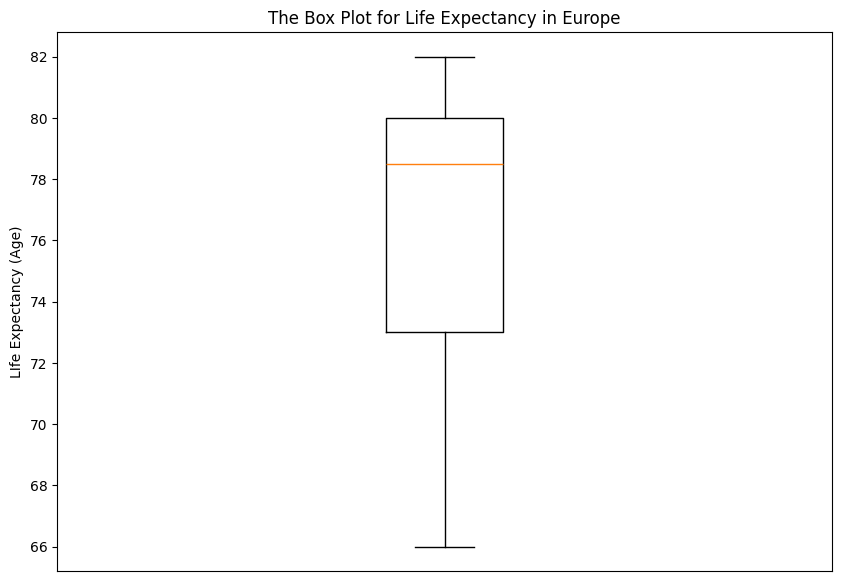

In [12]:
# creating the figure
fig, ax = plt.subplots(figsize=(10, 7))

# creating the box plot
box_plot_life_exp = ax.boxplot(europe_df['life_exp'])

# adding the title, x axis and removing x ticks
plt.title("The Box Plot for Life Expectancy in Europe")
plt.ylabel("LIfe Expectancy (Age)")
ax.set_xticks([]) 

# saving the box plot figure
plt.savefig(r"C:\GitHub\DataScience\wk_06\plots\BoxPlotLifeExpEU.png")

# displaying the box plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section Two </font>
- https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
- https://sparkbyexamples.com/pandas/pandas-filter-rows-by-conditions/

## <font color = '#FF8C00'> Section 3 | Two Sample T-test </font>
A two-sample t-test is meant to compare a numerical variable against a categorical variable. The goal is to assess whether the numerical variable is "different" across the categories. In this section, we compare the life expectancy in Europe against the life expectancy in Asia. We achieve this in the following steps below:
- [x] Create a third data set that includes only rows in which regionname is “Asia.”
- [x] The test statistic is shown in the formula section below. The p-values are also computed using the degrees of freedom, which is calculated using the formula below. 
- [x] Write a function that takes two data set inputs and returns the test statistic and p-values as outputs
- [x] We then use the function we built to assess whether the life expetancy in Europe is different than the life expectancy in Asia
- [x] We then validate the function by comparing the results to the built-in two sample t-test using the the `ttest_ind` method from `scipy.stats`.


### <font color = '#FF8C00'> Formulas </font>
$$
t = \frac{\mu_1 - \mu_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

$$
\nu = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}
{\frac{s_1^4}{n_1^2 (n_1 - 1)} + \frac{s_2^4}{n_2^2 (n_2 - 1)}}
$$

### <font color = '#FF8C00'> Filtering Out Asia </font>
We start off by using the `new_world_df` data frame to filter out rows of data whose `regionname` is Asia. We would like to collect all the features and the data they have for each corresponding row to perform the two sample t-test.

In [13]:
# filtering out the rows that have the regionname set as Asia
asia_df = new_who_df[new_who_df['regionname'] == "Asia"]

# displaying the data frame with just the top 5
asia_df.head(5)

,country,life_exp,infant_mortality,phys_density,hospital_bed,health_exp_percent_gdp,OOP_percent_exp,health_exp_PC,fertility_rate,GNI_PC,regionname
0,Afghanistan,42,165,2.0,4.0,9.2,78.5,91.0,7.1,NaN,Asia
7,Armenia,69,22,37.0,44.0,4.7,87.6,226.0,1.4,5900.0,Asia
10,Azerbaijan,68,34,36.0,80.0,4.1,86.4,254.0,1.8,6260.0,Asia
12,Bahrain,75,9,27.0,27.0,3.6,68.0,NaN,2.3,34310.0,Asia
13,Bangladesh,64,47,3.0,3.0,3.2,88.3,37.0,2.9,1340.0,Asia


### <font color = '#FF8C00'> Building the Function </font>
We build this function so that it takes two data sets as inputs and returns the test statistic and p-value as outputs. We implement the formulas mentioned above to help calculate the degrees of freedom, the test statistic and the p-value.

In [14]:
# the function for the two sample t-test
def two_sample_t_test(feature_col_one, feature_col_two):

    # converting the feature into a list
    feature_list_one = feature_col_one.tolist()
    feature_list_two = feature_col_two.tolist()

    # calculating the mean from the two features
    mean_one = sum(feature_list_one) / len(feature_list_one)
    mean_two = sum(feature_list_two) / len(feature_list_two)

    # number of observations in each feature
    observation_one = len(feature_list_one)
    observation_two = len(feature_list_two)

    # (observation - mean) ^ 2 for dataset one
    difference_list_one = []
    for row_one in range(0, len(feature_list_one)):
        difference_one = (feature_list_one[row_one] - mean_one)**2
        difference_list_one.append(difference_one)
    
    # (observation - mean) ^ 2 for dataset two
    difference_list_two = []
    for row_two in range(0, len(feature_list_two)):
        difference_two = (feature_list_two[row_two] - mean_two)**2
        difference_list_two.append(difference_two)
    
    # finding the sum of the different list one and two
    sum_one = sum(difference_list_one)
    sum_two = sum(difference_list_two)

    # calculating the variance one and two
    variance_one = sum_one / (observation_one - 1)
    variance_two = sum_two / (observation_two - 1)

    # calculating the standard deviation one and two
    standard_deviation_one = math.sqrt(variance_one)
    standard_deviation_two = math.sqrt(variance_two)

    # calculating the numerator of the degrees of freedom
    numerator = ((standard_deviation_one**2 / observation_one) + (standard_deviation_two**2 / observation_two))**2

    # calculating the denominator part one
    denominator_part_one = (standard_deviation_one**4) / ((observation_one**2) * (observation_one - 1))
    denominator_part_two = (standard_deviation_two**4) / ((observation_two**2) * (observation_two - 1))
    denominator = denominator_part_one + denominator_part_two

    # calculating the degree of freedom
    degree_of_freedom = numerator / denominator

    # calculating the test statistic
    t_value = (mean_one - mean_two) / math.sqrt((standard_deviation_one**2 / observation_one) + 
                                                (standard_deviation_two**2 / observation_two))
    
    # calculating the p value
    p_value = 2 * (1 - t.cdf(abs(t_value), degree_of_freedom))

    # returning the t_value and p_value
    return t_value, p_value

### <font color = '#FF8C00'> Life Expectancy in Europe vs Asia </font>
We now calculate and compare the life expectancy in Europe vs in Asia. We do this by accessing the `life_exp` feature from both the data frames of Asia `asia_df` and Europe `europe_df`. We then take these features and put it into the function and get the t_value and p_value.

In [15]:
# using the function to retrieve the t_value and p_value
t_value, p_value = two_sample_t_test(asia_df["life_exp"], europe_df["life_exp"])
print("The test statistic value of Life Expectancy in Europe vs Asia: ", t_value, "\n")
print("The p value of Life Expectancy of Europe vs Asia: ", p_value)

The test statistic value of Life Expectancy in Europe vs Asia:  -5.884174172667128 

The p value of Life Expectancy of Europe vs Asia:  1.0064936417641945e-07


### <font color = '#FF8C00'> Validating the Function </font>
We now work on validating the function. We achieve this by using the `ttest_ind` method from the `scipy.stats` library. We then use the values we get from the method, to compare against the function we created.


In [16]:
# importing the scipy.stats library
from scipy import stats

# running the ttest_ind method from the scipy.stats library
t_value, p_value = stats.ttest_ind(a=asia_df["life_exp"], b=europe_df["life_exp"], equal_var=False)

# printing out the test statistic and p value
print("The Test Statistics of Life Expectancy in Europe vs Asia: ", t_value, "\n")
print("The p Value of Life Expectancy in Europe vs Asia: ", p_value, "\n")

The Test Statistics of Life Expectancy in Europe vs Asia:  -5.884174172667128 

The p Value of Life Expectancy in Europe vs Asia:  1.0064936415173571e-07 



### <font color = '#FF8C00'> Plotting the Violin Plot </font>
Lastly, we work on plotting a violin plot. Since the purpose of a two-sample t-test is to compare a numerical variable against a categorical variable. We achieve this by creating a violin plot of the life expectancy in Europe and life expectancy in Asia.

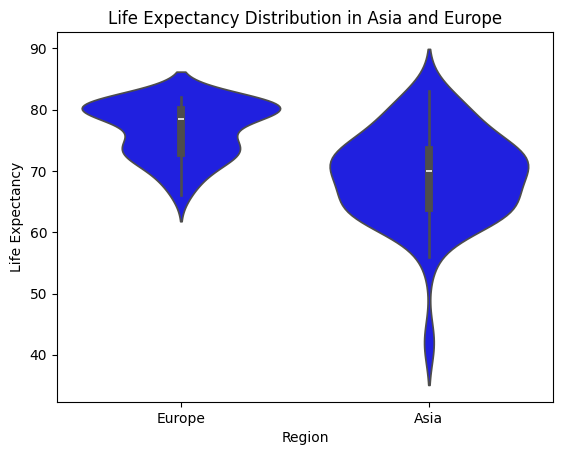

In [17]:
# importing the seaborn library
import seaborn as sns

# creating the violin plot for europe
sns.violinplot(
    x = ['Europe'] * len(europe_df),
    y = europe_df['life_exp'],
    color="blue"
)

# creating the violion plot for asia
sns.violinplot(
    x=["Asia"] * len(asia_df),
    y = asia_df['life_exp'],
    color="blue"
)

# Add title and labels
plt.title('Life Expectancy Distribution in Asia and Europe')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')

# saving the box plot figure
plt.savefig(r"C:\GitHub\DataScience\wk_06\plots\ViolinPlotLifeExpEUAS.png")


# Show the plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section Three </font>
- https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

## <font color = '#FF8C00'> Section 4 | Pearson's Correlation </font>
Pearson's correlation is meant to compare a numerical variable against another numerical variable. The goal of this is to assess whether the two variables "move" together in a significantly related way. We use the pearson's correlation as shown below in the formulas section. We achieve this in the following steps below:

- [x] Using the equations, write a function that takes two variables from a single dataset as inputs and returns the test statistic and the p-value as outputs.
- [x] Use the function to assess whether life expectancy is correlated with infant mortality across the entire data set.
- [x] Validate the code by comparing the results to the built-in correlation test. Use the `linregress` methods from `scipy.stats`




### <font color = '#FF8C00'> Formulas </font>
$$
R = \frac{\sum_{i=1}^{n} (x_{i,1} - \mu_1)(x_{i,2} - \mu_2)}
{\sqrt{\sum_{i=1}^{n} (x_{i,1} - \mu_1)^2} \sqrt{\sum_{i=1}^{n} (x_{i,2} - \mu_2)^2}}
$$

In this formula, $x_{i,1}$ and $x_{i,2}$ are the ith observations associated with variable 1 and variable 2, $\mu_1$ and $\mu_2$ are the means of each variable, and n is the number of observations. 

$$
t = \frac{R \sqrt{n - 2}}{\sqrt{1 - R^2}}
$$

Using the test statistic above, we compute the p-values with degrees of freedom by setting it to n-2

### <font color = '#FF8C00'> Building a Function </font>
We start off by building a function that takes two variables from a single data set as inputs and returns the test statistic and the p-value as outputs. 

In [18]:
# a function to calculate the test statistic
def pearson_correlation(feature_col_one, feature_col_two):

    # converting the features of columns to lists
    feature_list_one = feature_col_one.tolist()
    feature_list_two = feature_col_two.tolist()

    # calculating the mean for each column of data
    mean_one = sum(feature_list_one) / len(feature_list_one)
    mean_two = sum(feature_list_two) / len(feature_list_two)

    # creating a list to store the values
    numerator_list = []

    # (observatione one - mean one) * (observation two - mean two)
    for observation_one, observation_two in zip(feature_list_one, feature_list_two):
        multiply_values = (observation_one - mean_one) * (observation_two - mean_two)
        numerator_list.append(multiply_values)
    
    # finding the final value of the numerator
    numerator = sum(numerator_list)

    # creating a list for denominator part one and part two
    denominator_part_one_list = []
    denominator_part_two_list = []

    # (observation one - mean one)^2 and (observation two - mean two)^2
    for observation_one, observation_two in zip(feature_list_one, feature_list_two):
        part_one = (observation_one - mean_one)**2
        part_two = (observation_two - mean_two)**2
        denominator_part_one_list.append(part_one)
        denominator_part_two_list.append(part_two)
    
    # finding the value of the denominator
    part_one_denominator = math.sqrt(sum(denominator_part_one_list))
    part_two_denominator = math.sqrt(sum(denominator_part_two_list))
    denominator = part_one_denominator * part_two_denominator

    # calculating the pearson's correlation
    pearson_correlation = numerator / denominator

    # printing out the pearson coefficient
    print("The Pearson Coefficient: ", pearson_correlation)

    # finding the value of the fraction
    fraction = (len(feature_list_one) - 2) / (1 - (pearson_correlation)**2)
    
    # calculating the test statistic
    t_value = math.sqrt(fraction) * pearson_correlation
    
    # calculating the p value
    p_value = 2 * (1- t.cdf(abs(t_value), len(feature_list_one) - 2))

    # retuning the test statistic and p value
    return t_value, p_value

### <font color = '#FF8C00'> Life Expectancy vs Infant Mortality </font>
We now use the function we built in the previous cell to assess whether life expectancy is correlated with infant mortality across the entire dataset. For this, we use the `new_who_df` data frame, which will allow us to access the `life_exp` and `infant_mortality`.

In [19]:
# running the pearson correlation function
t_value_pearson, p_value_pearson = pearson_correlation(new_who_df["life_exp"], new_who_df["infant_mortality"])

# printing out the t-value and the p-value
print("The Test Statistic: ", t_value_pearson, "\n")
print("The P Value: ", p_value_pearson)


The Pearson Coefficient:  -0.9255371904433326
The Test Statistic:  -33.7804082017176 

The P Value:  0.0


### <font color = '#FF8C00'> Validating the Function </font>
We now validate the function by comparing the results with the built-in correlation test. We achieve this by using the `linregress` method from `scipy.stats`.


In [20]:
# importing the linregress
from scipy.stats import linregress

# performing the linear regression
value = linregress(new_who_df["life_exp"], new_who_df["infant_mortality"])

# printing the pearson coefficient and p value
print("The Pearson Coefficient: ", value.rvalue, "\n")
print("The P Value: ", value.pvalue)

The Pearson Coefficient:  -0.9255371904433327 

The P Value:  1.733832757295465e-82


### <font color = '#FF8C00'> Plotting the Scatter Plot </font>
We now move on to plotting the scatter plot. Since pearson's correlation is meant to compare a numerical variable against another numerical variable, we can then justify using a scatter plot to assess this.

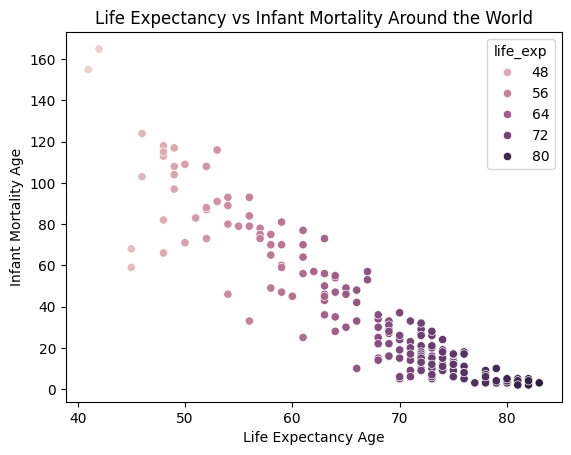

In [21]:
# plotting the scatter plot
sns.scatterplot(x=new_who_df["life_exp"], y=new_who_df["infant_mortality"], data=new_who_df,
                 hue=new_who_df["life_exp"])

# setting up the plot title, x and y labels
plt.title("Life Expectancy vs Infant Mortality Around the World")
plt.xlabel("Life Expectancy Age")
plt.ylabel("Infant Mortality Age")

# saving the plot
plt.savefig(r"C:\GitHub\DataScience\wk_06\plots\ScatterPlot.png")

# displaying the plot
plt.show()


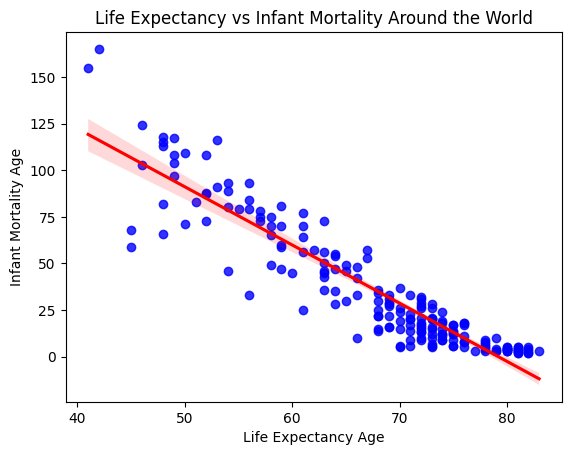

In [22]:
# plotting the scatter plot with a best-fit line
sns.regplot(x="life_exp", y="infant_mortality", data=new_who_df, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# setting up the plot title, x and y labels
plt.title("Life Expectancy vs Infant Mortality Around the World")
plt.xlabel("Life Expectancy Age")
plt.ylabel("Infant Mortality Age")

# saving the plot
plt.savefig(r"C:\GitHub\DataScience\wk_06\plots\ScatterPlotWithFitLine.png")

# displaying the plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section Four </font>
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html